**Title:** Using various Machine Learning algorithms to get a best prediction accuracy in the Pima indians dataset.

**Author:** Nyabuti Mainye

**Date:** 5/6/2017


### Introduction:

**Predictive analytics** is the practice of extracting information from existing data sets in order to determine patterns and predict future outcomes and trends.<sup>[1](http://www.webopedia.com/TERM/P/predictive_analytics.html)</sup> <sup>[2](https://gist.github.com/themiwi/5064046/revisions)</sup> It has a variety of applications in healthcare, credit scoring, recommendation systems like online newspapers and understanding shopping trends of customers. <sup>[3](http://www.predictiveanalyticsworld.com/businessapplications.php) </sup> On the other hand, these applications are possible by drawing from statistical techniques such as predictive modeling, machine learning and data mining. <sup>[4](https://en.wikipedia.org/wiki/Predictive_analytics)</sup> The dataset i will be using is the pima indians dataset. Let's proceed to the next section.


### Data:

Pima indians are native americans living in now central and southern Arizona in the United States of America. <sup>[5](https://en.wikipedia.org/wiki/Pima_people)</sup> However, this dataset consists of females at least 21 years old of the Pima Indian heritage.<sup>[7](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) </sup> Initially, it was used to forecast onset of diabetes mellitus *Smith et al. (1988)* using the ADAP learning algorithm.<sup>[8](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/)</sup> Though in my analysis i will attempt to use machine learning algorithms instead of artifical neural networks that were used in the initial study.

In line with scope of interest, is that given **predictor variables** namely:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

i will try to predict the **target variable** which has been convienently converted into (0 - doesn't have diabetes and 1 - the patient has diabetes. We will see this in the Exploratory Data analysis. 

### Exploratory Data analysis:


In [13]:
# Let's start by importing the data 
# importing modules that we'll need for the analysis
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv") # importing our data into the notebook
print(df.head(5)) # Examine first columns
print ("") # spacing for better reading
print (df.columns) # All the columns, we'll work with, they are formatted correctly 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [14]:
# Examining row object of columns, and a doing some summary statistics
print (df.info())
# we have 9 columns and 768 rows

print ("")

print (df.describe())
# there's something wrong with some columns, i think they are missing values for some columns such as BloodPressure since
# there are zeros in the minimum BMI as well as Glucose,BloodPressure,SkinThickness and Insulin
# Let's count the number of these occurences and draw some plots.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000  

In [15]:
#print(df.BMI.value_counts()); print ("") # 11 missing BMI records
#print(df.Glucose.value_counts()); print ("") # 5 missing
#print(df.BloodPressure.value_counts()); print ("") # 35 missing records
#print(df.SkinThickness.value_counts()); print ("") # 227 missing records Not sure about this one.
#print(df.Insulin.value_counts()); print ("") # 374 missing records

# Saving up on space
# i've already indicated the answers to the number of missing values for some colums
# percentage of data missing

missing = 11 + 5 + 35 + 374 # adding up the missing value occurences
msg = "About {}% missing data points in the pima indians dataset if i'm not wrong."
print (msg.format(round(missing/768 * 100))) # finding the percentage of missing data on the columns.

# I'll use an imputation strategy in the workflow to deal with missing data

About 55% missing data points in the pima indians dataset if i'm not wrong.


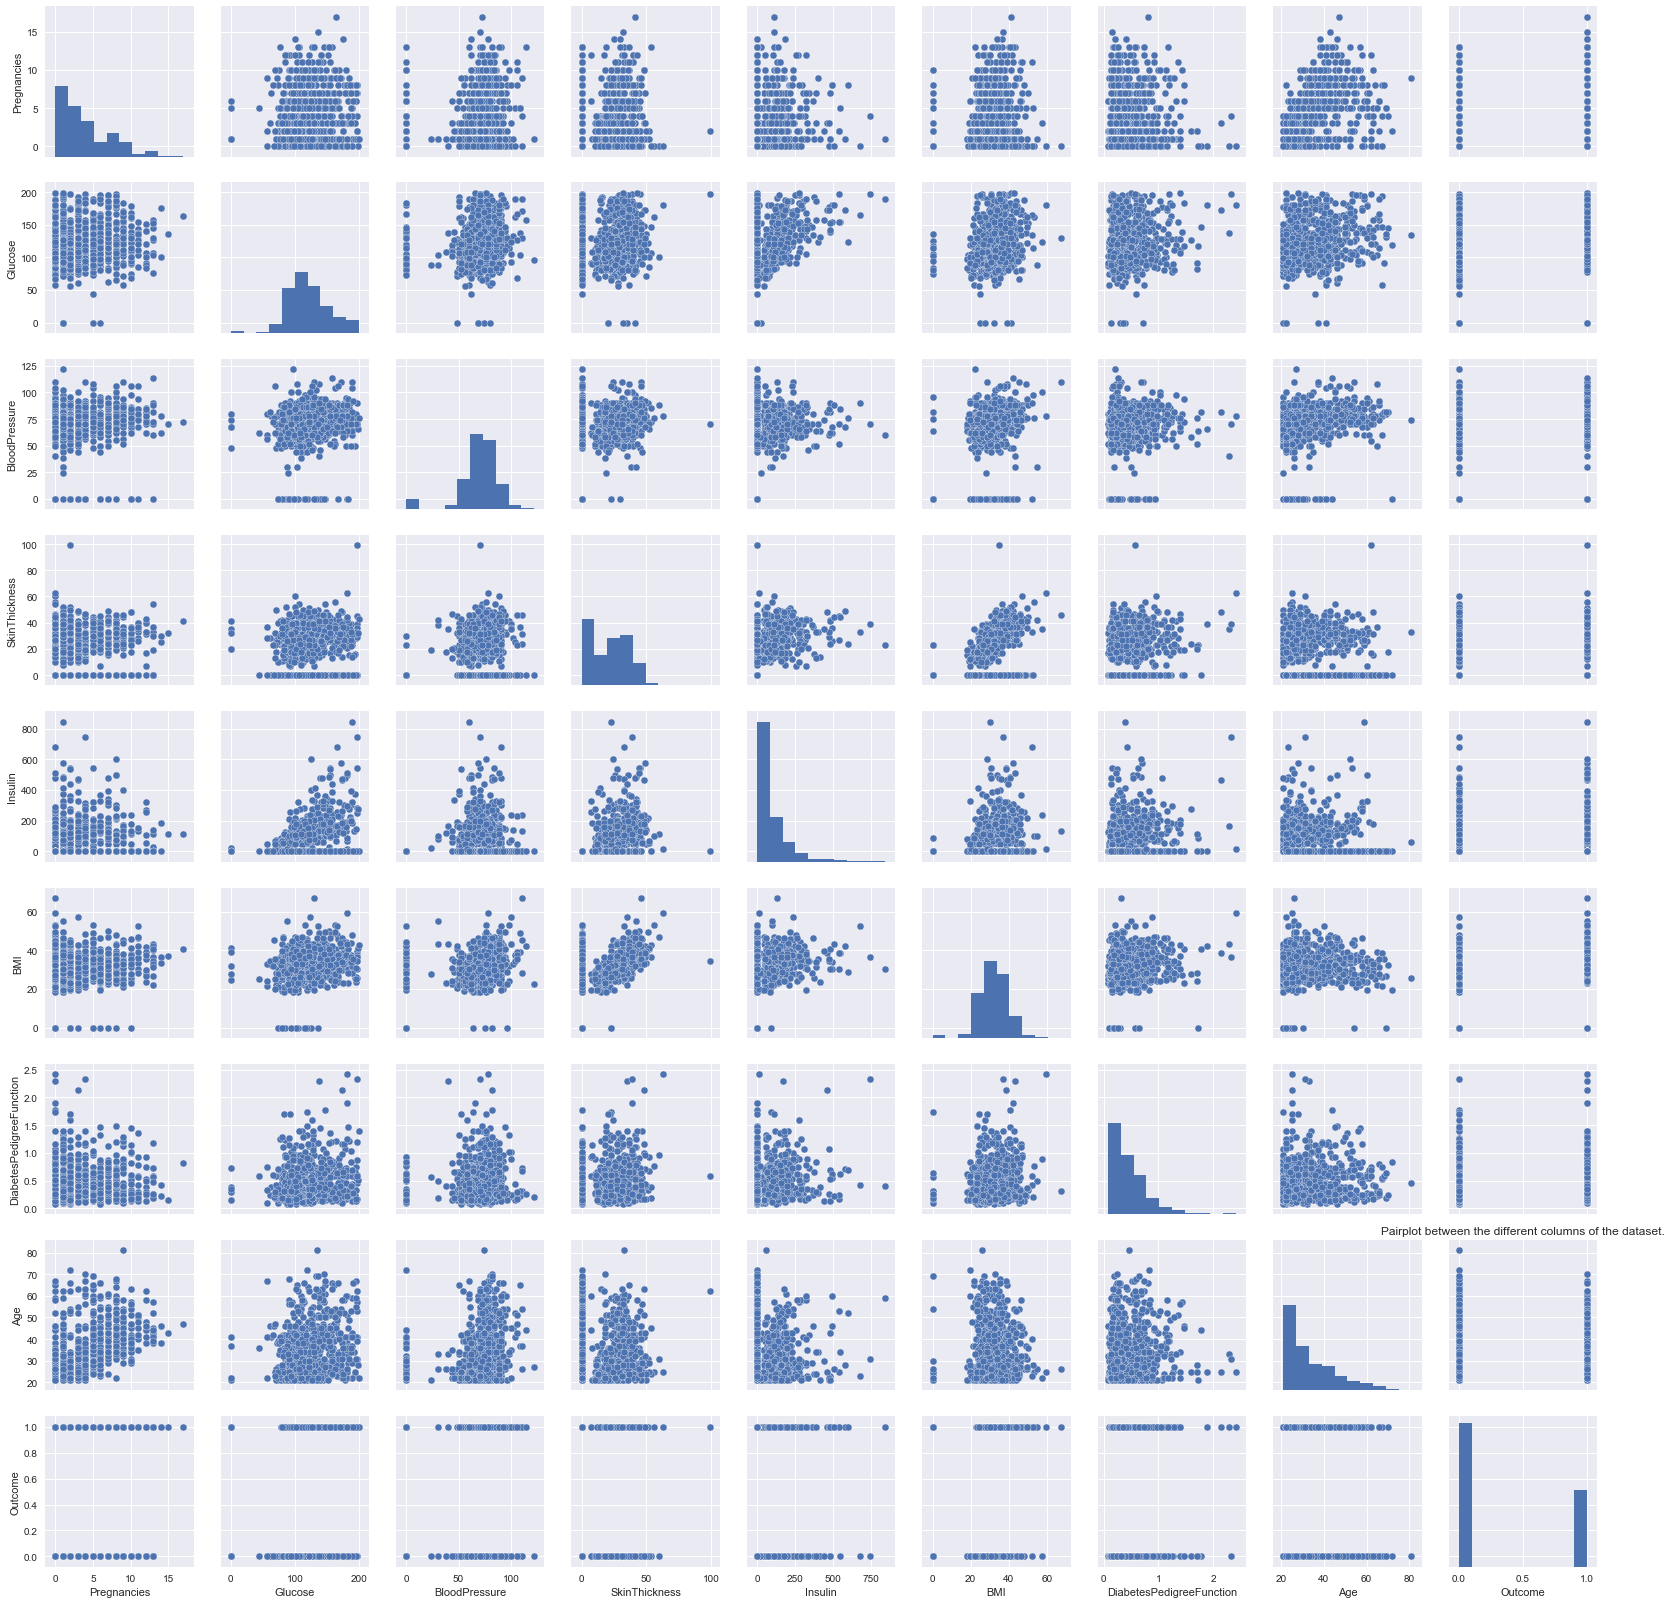

In [16]:
# exploratory visualisation to see if there is any correlation between columns
# since the columns are few, this plot is feasible i don't recommend it for many columns

# import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

sns.pairplot(df)
sns.plt.title("Pairplot between the different columns of the dataset.")

plt.show()

In [17]:
# some variables seem correlated. Let's try finding the pearson correlation coefficient for one.
# Let's try a correlation between Glucose column and Insulin
Glucoins = np.corrcoef(df.Insulin, df.Glucose)
print (Glucoins)
# that wasn't what i expected. O.3 is  really low positive correlation

[[ 1.          0.33135711]
 [ 0.33135711  1.        ]]


### Inference:

In [18]:
# Converting the dataframe into a numpy matrix
# this is a necessary step to proceed with the analysis of the data set for the algorithm in the library to work 

y = df['Outcome'].values # target
X = df.drop('Outcome', axis = 1).values #predictors

print (y)
print (X)
# successful

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

After successfully splitting the data into predictors and target matrices. Let's dive into the first machine learning technique **Random forests**. **Random Forests** is a collection of decision trees, where each tree is slightly different from the others.<sup>11</sup> Like decision trees which use if-else statements to finally get to a conclusion. However, they average out results and eliminate bias and give fair results.<sup>12</sup>

#### Random Forests

In [19]:
# Needed for the next step in model parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# random forest test
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate classifier
forest = RandomForestClassifier(n_estimators=10, random_state=0) 
# fit on training data
forest.fit(X_train, y_train)
# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.771


Before model tuning, i wanted to try the **Support Vector Machines** for classification. They make decision boundaries the algorithm will place the data to its respective boundary based of how near it is to the cluster of points placed on the data.

#### SVC

In [20]:
from sklearn.svm import SVC

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
# Instantiate classifier
svc = SVC(kernel = "linear") 
# fit on training data
svc.fit(X_train, y_train)
# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.927
Accuracy on test set: 0.948


Without, tuning the model parameters and adding partitionining the training and test data to 60:40 or 80:20 training and test. The two models make acceptable scores. But, **SVC** beat the random forests classifier in accuracy in test accuracy. Which model should i use which parameters will i tune to make the best prediction. I'll do that using pipelines next as well as cross-validation.

### Conclusion:

### References

1. http://www.webopedia.com/TERM/P/predictive_analytics.html retrieved on 02/06/17 at 11:07 A.M EAT
2. https://gist.github.com/themiwi/5064046/revisions retrieved on 02/06/17 at 11:07 A.M EAT
3. http://www.predictiveanalyticsworld.com/businessapplications.php retrieved on 02/06/17 at 11:07 A.M EAT
4. https://en.wikipedia.org/wiki/Predictive_analytics retrieved on 02/06/17 at 11:07 A.M EAT
5. Changing text colour https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook retrieved on 02/06/17 at 11:17 A.M EAT
6. https://en.wikipedia.org/wiki/Pima_people retrieved on 06/06/17 at 10:53 A.M EAT
7. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes retrieved on 06/06/17 at 11:01 A.M EAT
8. Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988). Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus. Proceedings of the Annual Symposium on Computer Application in Medical Care, 261–265.
9. http://pandas.pydata.org/pandas-docs/stable/index.html retrieved on 07/06/17 at 10:31 A.M EAT
10. https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html retrieved on 08/06/17 at 12:26 P.M EAT
11. Andreas C. Müller and Sarah Guido (2017). Introduction to Machine Learning with Python A Guide for Data Scientists. O’Reilly Media, Inc. United States of America. pages read 83 - 88,
12. Samir Madhavan (2015). Mastering Python for Data Science. Packt Publishing. Birmingham, United Kingdom. pages read 187 - 188